In [406]:
import pickle , matplotlib.pyplot as plt, torch, numpy as np, argparse, time, os, scipy
from src.TorchDSP.pbc_new import NonlienarFeatures, FoPBC
from src.TorchDSP.dataloader import  get_signals
from src.TorchSimulation.receiver import  BER
from test import trainsfrom_signal, fit

train_path = "data/Nmodes1/train_data_afterCDCDSP.pkl"
test_path = "data/test_data_afterCDCDSP.pkl"

Nch = 1
Rs = 40
rho = 1
L = 800 
index_type = 'reduce-1'
train_p = [-2]
test_p = [-2]
n = 48000
lamb_l2 = 0

In [92]:
from src.data import load

## real data
data_train = load(1, 0, 4, 1, n_symbols=800000)[0]
data_test = load(2, 0, 4, 1, n_symbols=800000)[0]
data_test.a['freqspace'] = 50e9
data_train.a['freqspace'] = 50e9

loading data:   0%|          | 0/1 [00:00<?, ?it/s]

loading data:   0%|          | 0/1 [00:00<?, ?it/s]

           BER          SER       Qsq        SNR
dim0  0.010046  0.039786667  7.327060  14.068714
dim1  0.006574  0.026133332  7.888169  14.677987


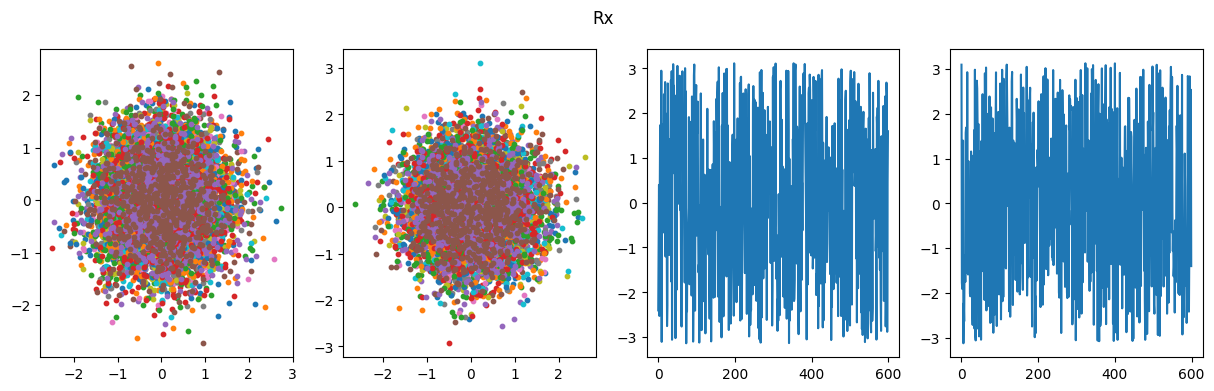

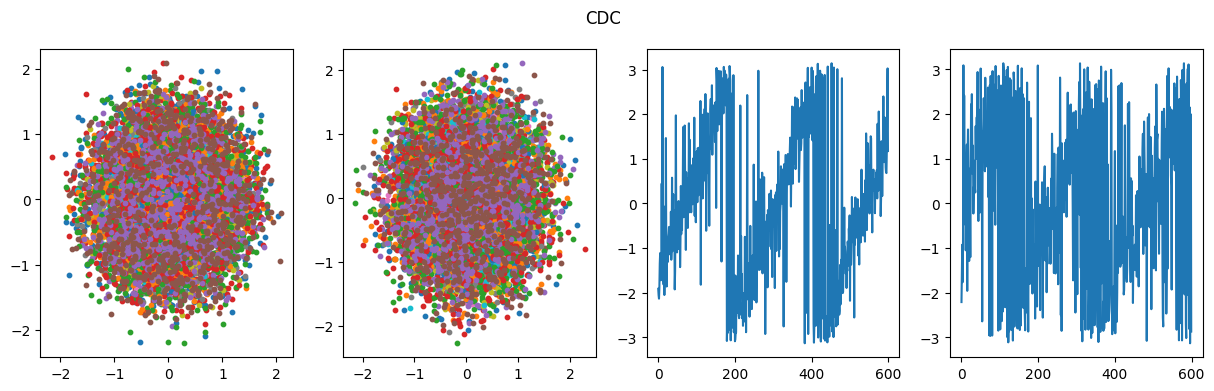

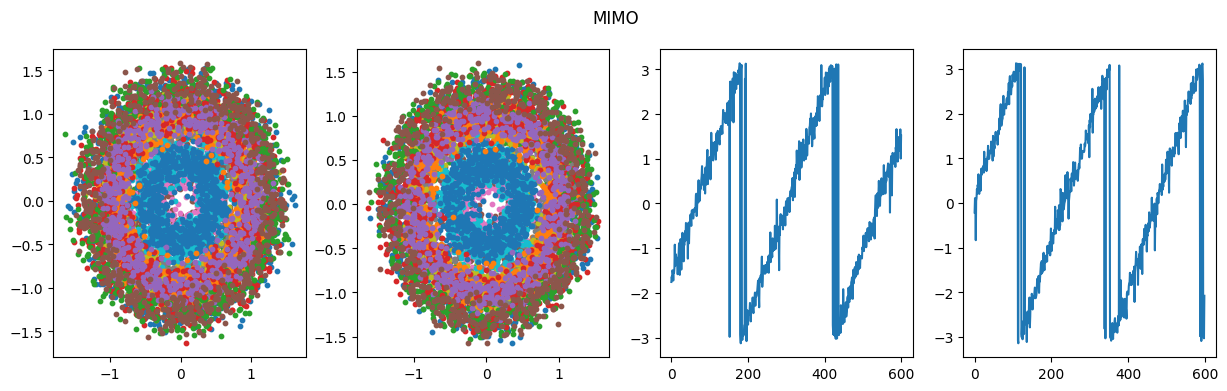

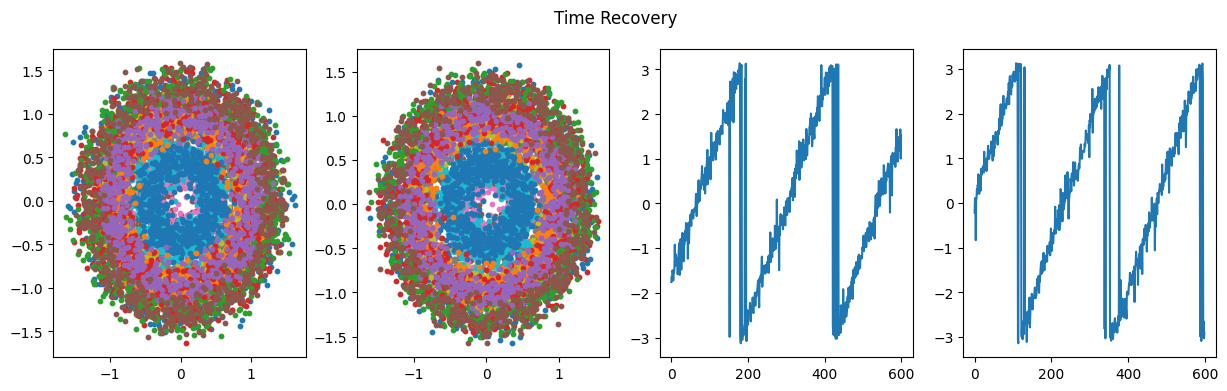

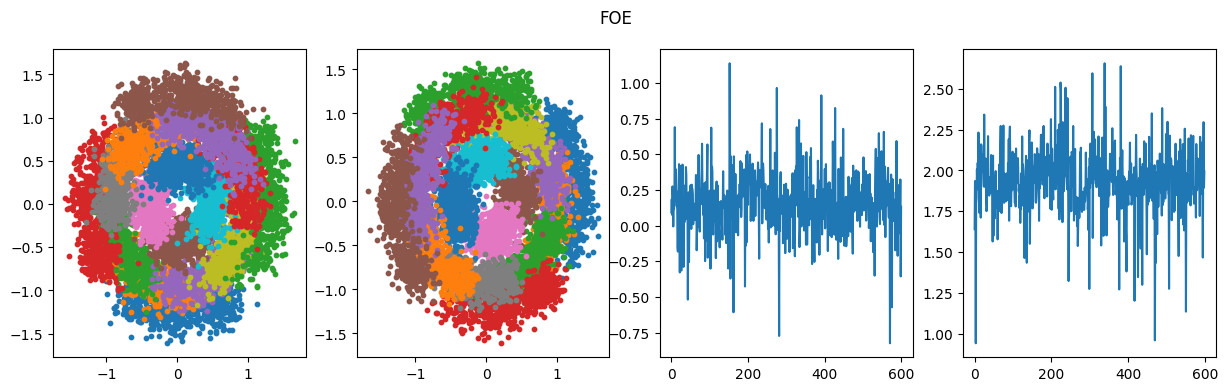

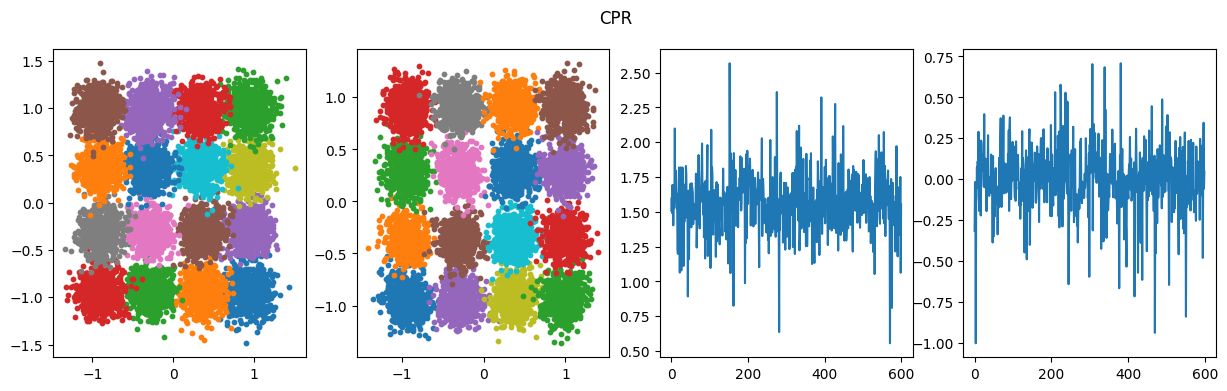

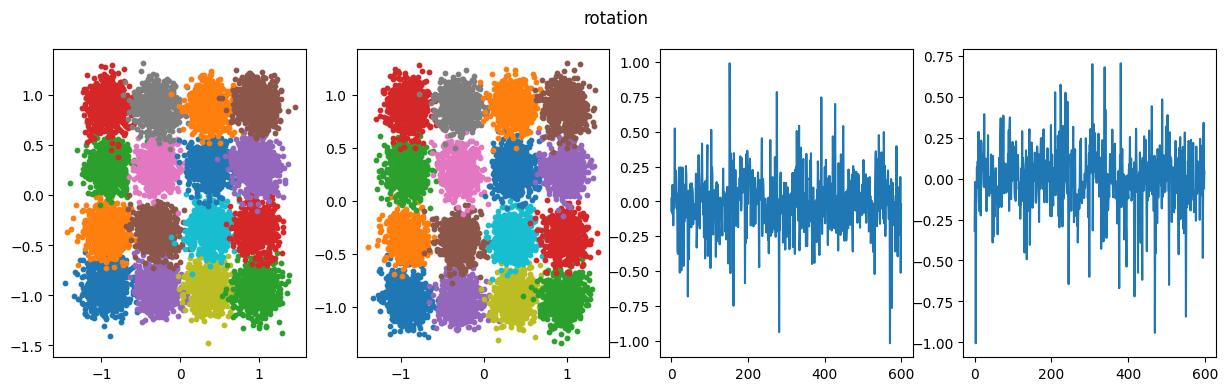

In [93]:
from src.eq import mimo_dsp, time_recovery_vmap, show_fig
from src.JaxSimulation.receiver import BER

## mimo_dsp  + sml_data
data = data_train
sig_list, metric = mimo_dsp(data, metric_fn=BER) 
print(metric)
sig = [(name,sig_list[name]) for name in sig_list.keys()]
show_fig(sig, data.x)

In [95]:
BER(sig[6][1].val, data.x, eval_range=(200000, -200000))

,BER,SER,Qsq,SNR
dim0,0.009867,0.039077498,7.352232,14.102284
dim1,0.006096,0.02424,7.981561,14.755944


In [85]:
import pickle
import torch
import jax

pickle.dump((torch.tensor(jax.device_get(sig[6][1].val[None, ...])),  torch.tensor(data.x[None,...]), torch.tensor([[0, 0.0, 72e9, 7]])), open('data/lab/train_Rs36G_Nch7_Pch0.pkl','wb'))